# Imports and data inits

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/All New Signals.csv")
# df
# print(df['weather'].value_counts())
# df['Ridership'].mean()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.dropna()


# One hot encode the categorical values

In [91]:
df2 = pd.get_dummies(df, prefix=['weather'], columns=['weather'])
df2
df2.columns

Index(['Ridership', 'day temp', 'night temp', 'barclays-center_event_occurred',
       'beacon-theatre_event_occurred', 'blue-note-jazz-club_event_occurred',
       'brooklyn-bowl_event_occurred', 'carnegie-hall_event_occurred',
       'city-winery-the-loft_event_occurred', 'total_comedy', 'total_events',
       'total_film-screenings', 'forest-hills-stadium_event_occurred',
       'irving-plaza_event_occurred', 'kings-theatre_event_occurred',
       'lincoln-center_event_occurred', 'madison-square-garden_event_occurred',
       'mercury-lounge_event_occurred', 'metlife-stadium_event_occurred',
       'total_music', 'palladium-times-square_event_occurred',
       'radio-city-music-hall_event_occurred', 'sony-hall_event_occurred',
       'terminal-5_event_occurred', 'the-bowery-ballroom_event_occurred',
       'the-town-hall_event_occurred', 'yankee-stadium_event_occurred',
       'weather_Broken clouds', 'weather_Clear sky',
       'weather_Cloudy and light snow', 'weather_Drizzle',
  

# Add past 14 days worth of data to df3

In [92]:
df3 = df2.copy()
df3['ridership_shift_1_days'] = df3['Ridership'].shift(1)
df3['ridership_shift_2_days'] = df3['Ridership'].shift(2)
df3['ridership_shift_3_days'] = df3['Ridership'].shift(3)
df3['ridership_shift_4_days'] = df3['Ridership'].shift(4)
df3['ridership_shift_5_days'] = df3['Ridership'].shift(5)
df3['ridership_shift_6_days'] = df3['Ridership'].shift(6)
df3['ridership_shift_7_days'] = df3['Ridership'].shift(7)
df3['ridership_shift_8_days'] = df3['Ridership'].shift(8)
df3['ridership_shift_9_days'] = df3['Ridership'].shift(9)
df3['ridership_shift_10_days'] = df3['Ridership'].shift(10)
df3['ridership_shift_11_days'] = df3['Ridership'].shift(11)
df3['ridership_shift_12_days'] = df3['Ridership'].shift(12)
df3['ridership_shift_13_days'] = df3['Ridership'].shift(13)
df3['ridership_shift_14_days'] = df3['Ridership'].shift(14)
df3[['Ridership','ridership_shift_1_days','ridership_shift_14_days']].head(16)

,Ridership,ridership_shift_1_days,ridership_shift_14_days
date,,,
2020-03-01,2212965.0,NaN,NaN
2020-03-02,5329915.0,2212965.0,NaN
2020-03-03,5481103.0,5329915.0,NaN
2020-03-04,5498809.0,5481103.0,NaN
2020-03-05,5496453.0,5498809.0,NaN
2020-03-06,5189447.0,5496453.0,NaN
2020-03-07,2814637.0,5189447.0,NaN
2020-03-08,2120656.0,2814637.0,NaN
2020-03-09,4973513.0,2120656.0,NaN


# ==================================================
# Data prep complete, nothing needs to be done above
# ==================================================

# Run and Test Data

In [93]:
# Setting up past and future data
mock_modeling_data_df = df3.loc['2020-03-15':'2023-02-16']

forecast_verification_df = df3.loc['2023-02-16':'2023-03-02']
forecast_verification_df

,Ridership,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,city-winery-the-loft_event_occurred,total_comedy,...,ridership_shift_5_days,ridership_shift_6_days,ridership_shift_7_days,ridership_shift_8_days,ridership_shift_9_days,ridership_shift_10_days,ridership_shift_11_days,ridership_shift_12_days,ridership_shift_13_days,ridership_shift_14_days
date,,,,,,,,,,,,,,,,,,,,,
2023-02-16,3683782.0,64.0,59.0,0,0,1,1,0,1,37,...,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0,1625375.0,1742435.0,3189550.0,3699932.0
2023-02-17,3253165.0,59.0,59.0,1,1,1,1,0,1,26,...,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0,1625375.0,1742435.0,3189550.0
2023-02-18,2271106.0,41.0,32.0,1,1,1,1,0,1,42,...,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0,1625375.0,1742435.0
2023-02-19,1824136.0,48.0,39.0,1,1,1,1,0,1,25,...,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0,1625375.0
2023-02-20,2238528.0,55.0,48.0,0,0,1,1,1,1,17,...,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0
2023-02-21,3325483.0,45.0,50.0,0,0,1,0,0,1,25,...,3683782.0,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0
2023-02-22,3454275.0,43.0,41.0,0,0,1,0,0,1,24,...,3253165.0,3683782.0,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0
2023-02-23,3498242.0,43.0,41.0,0,1,1,0,0,0,31,...,2271106.0,3253165.0,3683782.0,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0
2023-02-24,3244250.0,39.0,43.0,1,1,1,1,0,1,42,...,1824136.0,2271106.0,3253165.0,3683782.0,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0


In [94]:
# Encode the label using LabelEncoder
X = mock_modeling_data_df.loc[:, 'day temp':]
# X = mock_modeling_data_df.loc[:, 'Ridership':'weather_Thunderstorm with rain']
y = mock_modeling_data_df.loc[:, 'Ridership']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [95]:
# Scaling data with StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()

# Fitting standard scaler on X_train and y_train using transform
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Fitting standard scaler on X_test and y_test using transform
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# Random Forest Report

In [96]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth = 10) #mse default criterion
# max_features number taken from square rooting total number of features

rf = forest.fit(X_train,y_train)
rf.score(X_test, y_test)
print(f'rf.score = {rf.score(X_train,y_train)}')
print('---------------')
print(f'rf.feature_importances_ = \n{(rf.feature_importances_)}')
print('---------------')
dtf = rf.feature_importances_
dt = pd.DataFrame(index = X.columns)
dt['Features Importance'] = dtf
dt = dt.sort_values('Features Importance', ascending = False)
print(f'dt(feature_importances_) = \n{dt}')
print('---------------')
print("Model Accuracy: %.3f" % rf.score(X_test, y_test))
print('---------------')
#
# Create the mean squared error
#
mserf = mean_squared_error(y_test, rf.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mserf))

rf.score = 0.9859803082025324
---------------
rf.feature_importances_ = 
[2.02292215e-03 1.90577707e-03 7.18590008e-05 1.43387736e-04
 2.59523016e-05 3.27568264e-04 2.09247297e-04 5.63319826e-04
 3.29545991e-03 6.84384881e-03 1.23780053e-03 1.20714860e-04
 2.29217887e-04 2.33045924e-04 2.35233138e-05 5.47531713e-04
 5.52397290e-04 6.37135573e-04 3.40870467e-03 1.08152740e-04
 2.17275342e-04 1.95634268e-04 5.47377831e-05 1.40484189e-04
 1.16930003e-04 9.96399200e-05 1.40945153e-04 2.69326190e-04
 1.58587600e-05 9.51721706e-05 3.71465094e-05 3.74645268e-04
 1.84916183e-05 5.19790165e-05 2.10307592e-03 1.26930291e-04
 7.15752875e-05 1.08856406e-04 1.28315394e-04 0.00000000e+00
 6.34566392e-05 0.00000000e+00 4.03525587e-06 3.27218486e-05
 1.58291950e-06 7.74761719e-05 4.02640185e-02 2.14101650e-03
 1.68591613e-03 1.84629537e-03 5.15694585e-03 9.49630786e-03
 7.50749230e-01 3.97758713e-03 4.66812397e-03 6.46025351e-03
 3.83008704e-03 5.00424708e-03 5.03133247e-03 1.32634779e-01]
-----------

# =======================
# Create Forecasting Data
## Code here onwards will be standalone and it will recursively forecast the next 14 days' ridership
## Data retrieved comes from df3
# =======================

In [97]:
# init
all_data_df = df3.copy()

## Helper Functions

In [98]:
def update_shifted_ridership_data():
  """
  Updates "ridership_shift_#_days" values based on shifted "Ridership" data
  """
  all_data_df['ridership_shift_1_days'] = all_data_df['Ridership'].shift(1)
  all_data_df['ridership_shift_2_days'] = all_data_df['Ridership'].shift(2)
  all_data_df['ridership_shift_3_days'] = all_data_df['Ridership'].shift(3)
  all_data_df['ridership_shift_4_days'] = all_data_df['Ridership'].shift(4)
  all_data_df['ridership_shift_5_days'] = all_data_df['Ridership'].shift(5)
  all_data_df['ridership_shift_6_days'] = all_data_df['Ridership'].shift(6)
  all_data_df['ridership_shift_7_days'] = all_data_df['Ridership'].shift(7)
  all_data_df['ridership_shift_8_days'] = all_data_df['Ridership'].shift(8)
  all_data_df['ridership_shift_9_days'] = all_data_df['Ridership'].shift(9)
  all_data_df['ridership_shift_10_days'] = all_data_df['Ridership'].shift(10)
  all_data_df['ridership_shift_11_days'] = all_data_df['Ridership'].shift(11)
  all_data_df['ridership_shift_12_days'] = all_data_df['Ridership'].shift(12)
  all_data_df['ridership_shift_13_days'] = all_data_df['Ridership'].shift(13)
  all_data_df['ridership_shift_14_days'] = all_data_df['Ridership'].shift(14)

In [99]:
# import datetime
from datetime import datetime, timedelta

def generate_modeling_and_forecasting_df(modeling_date_from, forecast_date_from):
  """
  Setting up past and future data from all_data_df
  """

  # # The following code logic is repeated
  # modeling_data_df = all_data_df.loc['2020-03-15':'2023-02-16']
  # forecasting_df = all_data_df.loc['2023-02-16'] # from date range '2023-02-16':'2023-03-02'

  modeling_data_df = all_data_df.loc[modeling_date_from : (forecast_date_from - timedelta(days=1))] # modeling_date_to is one day before forecast_date_from
  forecasting_df = all_data_df.loc[forecast_date_from]

  return modeling_data_df, forecasting_df

In [100]:
def parse_train_test_split(X, y):
  """
  Returns the train and test variables "X_train, X_test, y_train, y_test"
  In serialized (non random) split models this function needs update
  """
  # # Set the train and test variables. While seeming redundant, this step exists
  # # to account for manual train and test split for squential modeling
  return train_test_split(X, y, random_state=42, test_size = 0.2)

## Run Code

In [101]:
# Init

model_generation_from_date = datetime.strptime('2020-03-15', '%Y-%m-%d')
model_generation_to_date = None # datetime.strptime('2023-02-17', '%Y-%m-%d')

forecast_generation_from_date = '2023-02-17'
forecast_generation_to_date = '2023-03-02'

verification_data_series = all_data_df['Ridership'].copy()
all_data_df.loc[forecast_generation_from_date:, "Ridership"] = 0

# Setting forecast data. Past data will be processed in each loop
forecast_iteration_df = all_data_df.loc[forecast_generation_from_date:forecast_generation_to_date]

# pd.DataFrame([all_data_df['Ridership'].tail(20), verification_data_series.tail(20)]).transpose()

In [102]:
df3

,Ridership,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,city-winery-the-loft_event_occurred,total_comedy,...,ridership_shift_5_days,ridership_shift_6_days,ridership_shift_7_days,ridership_shift_8_days,ridership_shift_9_days,ridership_shift_10_days,ridership_shift_11_days,ridership_shift_12_days,ridership_shift_13_days,ridership_shift_14_days
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,2212965.0,41.0,27.0,0,1,1,1,0,0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,5329915.0,54.0,37.0,1,1,1,1,0,0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,5481103.0,57.0,52.0,1,0,1,1,0,0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,5498809.0,54.0,50.0,1,0,1,1,0,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,5496453.0,50.0,45.0,1,0,1,1,0,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-26,1623164.0,43.0,32.0,1,1,1,1,0,1,23,...,3325483.0,2238528.0,1824136.0,2271106.0,3253165.0,3683782.0,3762817.0,3812943.0,3303337.0,1746099.0
2023-02-27,3335204.0,39.0,36.0,0,0,1,0,0,1,21,...,3454275.0,3325483.0,2238528.0,1824136.0,2271106.0,3253165.0,3683782.0,3762817.0,3812943.0,3303337.0
2023-02-28,3408751.0,37.0,36.0,1,0,1,0,0,1,30,...,3498242.0,3454275.0,3325483.0,2238528.0,1824136.0,2271106.0,3253165.0,3683782.0,3762817.0,3812943.0


In [107]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# For each row in forecast_verification_df, recursive analysis should rebuild training and testing data
## this implies there will be a new 80/20 split for each new model
## folding would help ensure consistency between each iterations

# The for loop will iterate through the dates from 2023-02-17 to 2023-03-02
# Total of 14 iterations should run, each building a new modeling_df that will
# Iteratively add one more date before generating a new model
dt2 = pd.DataFrame()
for index, row in forecast_iteration_df.iterrows():

  update_shifted_ridership_data()  

  forecast_generation_to_date = index

  # The following retrieves data from all_data_df - all_data_df will be updated at the bottom of the for loop
  modeling_df, forecasting_df = generate_modeling_and_forecasting_df(model_generation_from_date, forecast_generation_to_date)

  # Set X to Independent Variables - This includes the 14 day shifted dates
  # Set y to Dependent Variable Ridership
  modeling_X = modeling_df.loc[:, 'day temp':]
  modeling_y = modeling_df.loc[:, 'Ridership']
  forecasting_X = pd.DataFrame(forecasting_df.loc['day temp':].to_frame()).transpose()
  # forecasting_X = forecasting_df.loc[:, 'day temp':]
  forecasting_y = 0 # Value to be predicted

  # Reshape the input data into a 3D tensor for LSTM modeling
  modeling_X = modeling_X.values.reshape((modeling_X.shape[0], 1, modeling_X.shape[1]))
  forecasting_X = forecasting_X.values.reshape((forecasting_X.shape[0], 1, forecasting_X.shape[1]))

  # Scale the data using MinMaxScaler
  scaler_x = StandardScaler()
  scaler_y = StandardScaler()
  modeling_X = scaler_x.fit_transform(modeling_X.reshape(-1, modeling_X.shape[-1])).reshape(modeling_X.shape)
  modeling_y = scaler_y.fit_transform(modeling_y.values.reshape(-1, 1)).reshape(-1)
  forecasting_X = scaler_x.transform(forecasting_X.reshape(-1, forecasting_X.shape[-1])).reshape(forecasting_X.shape)

  # Define the Keras model function
  def create_model():
      model = Sequential()
      model.add(LSTM(128, input_shape=(modeling_X.shape[1], modeling_X.shape[2]), return_sequences=True))
      model.add(Dropout(0.2))
      model.add(LSTM(64, return_sequences=True))
      model.add(Dropout(0.2))
      model.add(LSTM(32))
      model.add(Dense(1))
      model.compile(loss='mean_squared_error', optimizer='adam')
      return model

  # Create the KerasRegressor
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)

  # Create the pipeline
  pipeline = Pipeline([
      # ('scaler', MinMaxScaler()), #handled above
      ('keras', keras_regressor)
  ])

  pipeline.fit(modeling_X, modeling_y)

  pred = pipeline.predict(forecasting_X)
  # Make predictions on the test data
  print(pred)
  print(forecasting_X)
  # forecasting_y = scaler_y.inverse_transform(pred)
  forecasting_y = scaler_y.inverse_transform(pred.reshape(-1, 1)).reshape(-1)

  print(forecasting_y)
  
  all_data_df.at[index,'Ridership'] = forecasting_y


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.21478367
[[[-0.160985    0.28536735  1.73530349  1.9734476   0.64866964
    1.32287566 -0.58492595  1.07902743  1.31253932  1.92541619
    1.65873276 -0.20242433  1.62149675 -0.42769946 -0.22173004
   -0.83932881  1.64856605 -0.36427516  1.17018896 -0.33385376
   -0.50087848  1.36685024 -0.48913871 -0.83932881 -0.5502802
   -0.50818768 -0.52565748 -0.52275203 -0.04333514 -0.19216935
   -0.3965688  -0.19990251 -0.12338394 -0.06861558  6.20632891
   -0.09726632 -0.13464684 -0.13464684 -0.41536426 -0.03062819
   -0.3321171  -0.04333514 -0.05309942 -0.07520002 -0.05309942
   -0.08126361  1.68708507  1.77106161  1.82213597  1.28270215
   -0.34787167  0.26060492  1.51478585  1.74134934  1.76079527
    1.70777239  1.32145015 -0.47311851 -0.35525073  1.11623587]]]
[2282558.]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.3287292
[[[-1.18246942 -1.43290669  1.73205081  1.96893685  0.6482382
    1.32117421 -0.58455842  1.07793475  2.72287681  2.54318941
    1.43758181 -0.20232566  1.61874611  2.33938609 -0.2216211
    1.19237943  1.64570147 -0.36408196  0.87826761  2.99688312
   -0.50058514  1.36501677 -0.48885491  1.19237943 -0.54994456
   -0.5078883  -0.52534338  1.9140939  -0.04331481 -0.19207604
   -0.39635391 -0.19980516 -0.12332528 -0.0685833  -0.16408253
   -0.09722035 -0.13458264 -0.13458264 -0.41513623 -0.03061384
   -0.33194444 -0.04331481 -0.05307449 -0.0751646  -0.05307449
   -0.0812253   0.21526544  1.68476705  1.76593844  1.81400491
    1.27549011 -0.34937531  0.26068968  1.51437035  1.73068764
    1.74808593  1.69544384  1.3113634  -0.47401635 -0.35552959]]]
[2391355.5]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.26105013
[[[-0.78394373 -0.98564074  1.72881635  1.9644569   0.64780762
    1.31947931 -0.58419158  1.07684537  1.21643024  1.19804774
    0.78112003 -0.20222713 -0.61880827 -0.42875596 -0.22151233
   -0.83960954  1.64285177 -0.36388907  0.51422087 -0.33523564
   -0.50029231 -0.7335731  -0.48857159  1.19102982 -0.54960954
   -0.50758946 -0.52502983 -0.52357987 -0.04329451 -0.19198286
   -0.39613938 -0.19970796 -0.12326671 -0.06855106 -0.1640037
   -0.09717443 -0.13451854 -0.13451854  2.41016954 -0.0305995
   -0.33177204 -0.04329451 -0.05304959 -0.07512924 -0.05304959
   -0.08118705  0.32925438  0.21376749  1.67981559  1.75801177
    1.80495433  1.26787986 -0.34957547  0.26003019  1.50474001
    1.71818441  1.73558672  1.68344813  1.302221   -0.47435004]]]
[2326983.2]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.22474381
[[[-0.38608044 -0.41229681 -0.5795086  -0.51020216  0.6473779
    1.31779091  1.71284078  1.0757593   0.51128093  0.05152053
    0.01692377 -0.20212875 -0.61840839 -0.42851875 -0.22140372
    1.19197923  1.64001682 -0.36369648  0.15047273 -0.33506136
   -0.5        -0.73304592 -0.48828877 -0.84055879 -0.54927513
   -0.50729114 -0.52471685 -0.52326812 -0.04327423 -0.19188983
    2.52572967 -0.19961089 -0.12320822 -0.06851887 -0.16392499
   -0.09712859 -0.13445453 -0.13445453 -0.41622784 -0.03058519
   -0.33159992 -0.04327423 -0.05302472 -0.07509393 -0.05302472
   -0.08114885  0.26154945  0.32769463  0.21137433  1.67218042
    1.74919208  1.79537318  1.26843464 -0.35035506  0.25589561
    1.4934788   1.70588685  1.72342506  1.67261052  1.30270512]]]
[2292502.8]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.29207724
[[[-0.95363029 -0.28481418 -0.57914719 -0.50990195  0.64694903
   -0.7598155  -0.58489765  1.0746765   1.21496361  0.48113333
    0.01691586 -0.20203051 -0.61800929 -0.42828193 -0.22129527
    1.19063312  1.6371965  -0.3635042   0.58673318 -0.33488734
   -0.4997082   1.36515067  2.04915327 -0.83988929 -0.54894132
   -0.50699335 -0.52440442 -0.52295693 -0.04325399 -0.19179692
   -0.3972881  -0.19951397 -0.12314981 -0.06848673 -0.16384638
   -0.0970828  -0.13439061 -0.13439061  2.40384713 -0.03057089
   -0.33142806 -0.04325399 -0.05299989 -0.07505866 -0.05299989
   -0.08111071  0.22522896  0.26002794  0.32510604  0.20819008
    1.66369108  1.739857    1.79617467  1.26797408 -0.35182701
    0.25126833  1.48240011  1.69392015  1.7124405   1.673266  ]]]
[2356756.8]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.13805082
[[[-1.06633758 -0.85757444 -0.57878647 -0.50960227  0.64652101
   -0.7592566  -0.58453152  1.07359696  1.12558306  0.84697526
    0.56285209 -0.20193241  1.61914225 -0.42804551 -0.22118698
   -0.84083671  1.63439067 -0.36331223  0.73185393  2.98762881
   -0.49941691 -0.73349852 -0.48918949  1.1915807  -0.54860812
   -0.50669608 -0.52409256 -0.52264629 -0.04323377  5.21637099
   -0.39707353 -0.19941719 -0.12309149 -0.06845462 -0.16376789
   -0.09703708 -0.13432678 -0.13432678 -0.41731421 -0.03055662
   -0.33125647 -0.04323377 -0.0529751  -0.07502345 -0.0529751
   -0.08107262  0.29258809  0.22372831  0.25755755  0.32158066
    0.20477346  1.65470881  1.74063358  1.79582151  1.25944779
   -0.35323933  0.24670345  1.47161478  1.68310923  1.71311554]]]
[2210218.5]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.21631514
[[[-1.06527627 -0.85688113 -0.57842641  1.96346724  0.64609384
   -0.75869894 -0.58416607 -0.93238296  1.74016802  1.16470342
    0.23483587 -0.20183446  1.61641412 -0.42780948 -0.22107884
   -0.84016805  1.63159923 -0.36312056  0.00372955  2.97389252
   -0.49912613  1.36430691 -0.48890697  1.19023807 -0.54827553
   -0.50639933 -0.52378125 -0.52233621 -0.04321358 -0.1942102
   -0.3968593  -0.19932055 -0.12303325 -0.06842257 -0.16368952
   -0.09699143 -0.13426305 -0.13426305  2.39758789 -0.03054236
   -0.33108515 -0.04321358 -0.05295034 -0.07498828 -0.05295034
   -0.08103459  0.13850283  0.29105126  0.22132183  0.25423742
    0.31777499  0.20122821  1.65544665  1.74027508  1.7850169
    1.24951724 -0.3546472   0.24223425  1.46185359  1.68377208]]]
[2284777.8]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.27839282
[[[-1.29130208 -0.72884598  1.72990319  1.95904003  0.64566752
    1.31901324 -0.58380131  1.07345452  2.70364327  1.94339172
    0.12544879 -0.20173665  1.61369974 -0.42757383 -0.22097087
    1.19118383  1.62882204 -0.36292919  1.71438618 -0.33779858
   -0.49883585  1.36249146 -0.48862493  1.18889997 -0.54794355
   -0.5061031  -0.52347049  1.91561093 -0.04319342 -0.19411636
   -0.39664542 -0.19922405 -0.12297509 -0.06839056 -0.16361125
   -0.09694584 -0.1341994  -0.1341994  -0.41839539 -0.03052813
   -0.33091409 -0.04319342 -0.05292561 -0.07495317 -0.05292561
   -0.0809966   0.21679676  0.13705164  0.28852984  0.21811239
    0.25066557  0.31381259  0.20129053  1.65507641  1.72975224
    1.7723333   1.2397447  -0.35605503  0.23808319  1.46241602]]]
[2343941.2]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.10267106
[[[-1.913989   -1.74729753  1.7266967  -0.51160247  0.64524204
    1.31733403 -0.58343723  1.07238053  3.04375738  2.16164462
    0.78132005 -0.20163898  1.61099898  2.34006487 -0.22086305
    1.18984467  1.62605898 -0.36273813  1.27487987 -0.33762351
   -0.49854609  1.36068324  2.04773942  1.18756638  1.82610991
   -0.5058074  -0.52316028 -0.52316028 -0.04317329 -0.19402265
   -0.39643188 -0.19912769 -0.12291702 -0.06835859 -0.1635331
   -0.09690032 -0.13413584 -0.13413584 -0.4181667  -0.03051391
   -0.33074329 -0.04317329 -0.05290092 13.3479087  -0.05290092
   -0.08095868  0.27889791  0.21530326  0.1347972   0.28511953
    0.2146666   0.24695374  0.31392736  0.2006312   1.64495895
    1.71740565  1.75985692  1.23022558 -0.35748697  0.23808471]]]
[2176957.2]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.17571405
[[[-1.05960013 -1.42588755  1.72350796  1.95578938  0.6448174
    1.31566123 -0.58307383  1.07130975  1.02156705  0.7435217
   -0.09399718 -0.20154145 -0.62177     2.33304817 -0.22075539
    1.18851001  1.62330993 -0.36254736  0.29177572 -0.33744872
   -0.49825682  1.3588822  -0.48952154  1.18623726 -0.54871511
   -0.50551221 -0.52285063 -0.52285063 -0.04315319 -0.19392907
    2.52385875 -0.19903147 -0.12285902 -0.06832667 -0.16345506
   -0.09685486 -0.13407238 -0.13407238 -0.41793838 -0.03049971
   -0.33057276 -0.04315319 -0.05287626 -0.0809208  -0.05287626
   -0.0809208   0.10310961  0.2773711   0.2129149   0.13185137
    0.28144458  0.21108982  0.2470376   0.31329121  0.1967968
    1.633099    1.70525951  1.74771556  1.22158939 -0.35775853]]]
[2246437.2]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.20338789
[[[-1.28527723 -1.16950353 -0.58128151 -0.51244764  0.64439359
   -0.76103803 -0.58271111  1.07024218  0.84601376  0.4255171
    1.87510156 -0.20144406 -0.62136977 -0.4299052  -0.22064789
    1.18717984  1.62057478 -0.3623569   0.4007362  -0.33727419
   -0.49796806 -0.73687173  2.04398743  1.18491259 -0.54838366
   -0.50521753  1.91372351 -0.52254153 -0.04313311 -0.19383564
   -0.39757328 -0.19893539 -0.12280111 -0.0682948  -0.16337713
   -0.09680946 -0.134009   -0.134009   -0.41771043 -0.03048554
   -0.33040249 -0.04313311 -0.05285164 -0.08088298 -0.05285164
   -0.08088298  0.17618004  0.10168038  0.27487684  0.20973519
    0.12870582  0.27762204  0.21115717  0.24638853  0.30897441
    0.19252672  1.62143016  1.69343788  1.73675067  1.22204146]]]
[2272811.8]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


-0.02565489
[[[-1.39702395 -1.16822009  1.72140503 -0.51214752  0.64397062
   -0.7604807  -0.58234907  1.06917779  1.63107504  0.66347599
    0.56000671 -0.20134682  1.61038298 -0.42966892 -0.22054055
   -0.84327404  1.61785341 -0.36216673  0.5460538  -0.33709993
   -0.4976798  -0.73634445  2.03909165  1.18359236 -0.54805281
   -0.50492337 -0.52367135 -0.52223297 -0.04311306 -0.19374234
   -0.39735971 -0.19883945 -0.12274328 -0.06826296 -0.16329932
   -0.09676412 -0.13394571 -0.13394571 -0.41748286 -0.03047138
   -0.33023249 23.19482701 -0.05282705 -0.08084521 -0.05282705
   -0.08084521  0.20386405  0.17471132  0.09949046  0.27151207
    0.20632289  0.12545074  0.27772035  0.21050136  0.24236118
    0.30412115  0.18831206  1.61007092  1.68275743  1.7374395 ]]]
[2055373.2]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.17550527
[[[-1.05528623 -1.29408711 -0.5819877  -0.51184793  0.64354849
    1.31592005 -0.5819877   1.06811657  0.49423419  0.47243013
    0.23176749 -0.20124971 -0.62200439 -0.42943304 -0.22043336
    1.1867949   1.61514571 -0.36197687  0.65491084 -0.33692594
   -0.49739204  1.35903116 -0.49158629  1.18227652 -0.54772256
   -0.50462973 -0.52336212 -0.52192496 -0.04309304 -0.19364917
   -0.39714647 -0.19874365 -0.12268553 -0.06823118 -0.16322161
   -0.09671886 -0.13388252 -0.13388252 -0.41725566 -0.03045725
    3.02972693 -0.0528025  -0.0528025  -0.08080749 -0.0528025
   -0.08080749 -0.02526528  0.20238086  0.17239643  0.0966552
    0.26788864  0.20278178  0.12547869  0.27707839  0.20662996
    0.23785744  0.29933369  0.18418221  1.59980162  1.68342281]]]
[2246324.]


<ipython-input-107-48cdee1c4c9d>:56: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=1024, verbose=0)


0.20251551
[[[-0.54453717 -0.72050632 -0.581627    1.95484745  0.64312718
   -0.76088591 -0.581627    1.06705851  1.19208842  1.13951355
    0.45034913 -0.20115275 -0.62160503 -0.42919754 -0.22032632
    1.18547257  1.61245155 -0.3617873   1.30976424 -0.33675223
    2.01164832  1.35724179 -0.49130368  1.18096507  1.82684137
   -0.50433659  1.91185052 -0.52161749 -0.04307305 -0.19355613
   -0.39693358 -0.19864798 -0.12262787 -0.06819943 -0.16314401
   -0.09667365 -0.13381941 -0.13381941 -0.41702883 -0.03044313
   -0.33161599 -0.05277798 -0.05277798 -0.08076983 -0.05277798
   -0.08076983  0.17597056 -0.02662152  0.20001935  0.16934297
    0.09363531  0.2641211   0.20284558  0.12480668  0.27292271
    0.20231442  0.23341326  0.29464829  0.18033407  1.60043026]]]
[2272033.]


In [108]:
pd.DataFrame([all_data_df['Ridership'].tail(20), verification_data_series.tail(20)]).transpose()

,Ridership,Ridership
date,,
2023-02-11,2333625.00,2333625.0
2023-02-12,1746099.00,1746099.0
2023-02-13,3303337.00,3303337.0
2023-02-14,3812943.00,3812943.0
2023-02-15,3762817.00,3762817.0
2023-02-16,3683782.00,3683782.0
2023-02-17,2282558.00,3253165.0
2023-02-18,2391355.50,2271106.0
2023-02-19,2326983.25,1824136.0


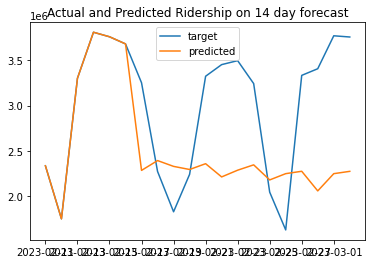

In [109]:
from matplotlib import pyplot as plt 

plt.plot(verification_data_series.tail(20), label='target')
plt.plot(all_data_df['Ridership'].tail(20), label='predicted')
plt.legend()
plt.title("Actual and Predicted Ridership on 14 day forecast")
plt.show()


     